# Worked Example 1: Exploratory Data Analysis on Titanic Dataset

**Author:** Trimbkeshwar  
**Course:** INFO 7390 - Understanding Data  
**Date:** January 2026

---

## 1. Dataset Description

### 1.1 Source and Context

**Dataset:** Titanic Passenger Survival Data  
**Source:** Seaborn built-in dataset (originally from Kaggle)  
**URL:** https://www.kaggle.com/c/titanic  

**Historical Context:**  
The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean on April 15, 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest peacetime maritime disasters in history.

### 1.2 Dataset Characteristics

**Size:** 891 passengers (rows) × 15 variables (columns)

**Variables:**

| Variable | Type | Description |
|----------|------|-------------|
| survived | Binary | Survival (0 = No, 1 = Yes) |
| pclass | Categorical | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) |
| sex | Categorical | Gender (male, female) |
| age | Numerical | Age in years |
| sibsp | Numerical | # of siblings/spouses aboard |
| parch | Numerical | # of parents/children aboard |
| fare | Numerical | Passenger fare in dollars |
| embarked | Categorical | Port of embarkation (C, Q, S) |
| class | Categorical | Ticket class name (First, Second, Third) |
| who | Categorical | Person type (man, woman, child) |
| adult_male | Boolean | Adult male indicator |
| deck | Categorical | Deck location (A-G) |
| embark_town | Categorical | Port name |
| alive | Categorical | Survival status (yes, no) |
| alone | Boolean | Traveling alone indicator |

### 1.3 Relevance to EDA Chapter

This dataset is ideal for demonstrating EDA concepts because it:

1. **Contains mixed data types** (numerical and categorical)
2. **Has missing values** requiring preprocessing decisions
3. **Shows clear patterns** discoverable through visual exploration
4. **Presents real-world complexity** (outliers, class imbalance, correlations)
5. **Tells a compelling story** connecting data to historical events
6. **Is small enough** to process quickly but large enough to be interesting

This example directly applies the EDA framework presented in our chapter, demonstrating how systematic exploration reveals insights that inform both understanding and modeling.

---

## 2. Problem Setup

### 2.1 Research Questions

This worked example addresses the following questions:

**Primary Question:**  
*What factors were most strongly associated with survival on the Titanic?*

**Secondary Questions:**
1. How did survival rates differ by passenger class?
2. Did gender play a role in survival outcomes?
3. What was the relationship between age and survival?
4. How did fare (ticket price) correlate with survival?
5. Did traveling with family affect survival chances?
6. Were there differences based on embarkation port?

### 2.2 Analysis Objectives

**Objective 1: Data Quality Assessment**
- Identify missing values and their patterns
- Detect outliers and anomalies
- Verify data consistency and accuracy

**Objective 2: Univariate Exploration**
- Understand distribution of each variable
- Calculate descriptive statistics
- Identify data characteristics (skewness, spread, central tendency)

**Objective 3: Bivariate Analysis**
- Explore relationships between survival and other variables
- Calculate correlation coefficients
- Compare survival rates across categories

**Objective 4: Pattern Discovery**
- Identify factors that increased survival probability
- Discover unexpected relationships
- Generate hypotheses for further investigation

**Objective 5: Actionable Insights**
- Provide recommendations for feature engineering
- Suggest preprocessing strategies
- Guide modeling approach

### 2.3 Expected Outcomes

By the end of this analysis, we will have:

✅ Complete understanding of data structure and quality  
✅ Statistical summaries for all variables  
✅ Visualizations revealing survival patterns  
✅ Quantified relationships between variables  
✅ List of key insights and modeling recommendations  

---

In [3]:
# =============================================================================
# STEP 1: IMPORT LIBRARIES AND LOAD DATA
# =============================================================================

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization parameters
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("STEP 1: ENVIRONMENT SETUP")
print("="*80)
print("\n✓ Libraries imported successfully")

# Load the dataset
df = pd.read_csv('../datasets/titanic.csv')

print(f"\n✓ Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n" + "="*80)
print("DATASET PREVIEW")
print("="*80)
df.head(10)

STEP 1: ENVIRONMENT SETUP

✓ Libraries imported successfully

✓ Dataset loaded: 891 rows × 15 columns

DATASET PREVIEW


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [5]:
# =============================================================================
# STEP 2: INITIAL DATA INSPECTION
# =============================================================================

print("="*80)
print("STEP 2: DATA STRUCTURE ANALYSIS")
print("="*80)

# Basic information
print("\n📊 Dataset Dimensions:")
print(f"   Rows: {df.shape[0]:,}")
print(f"   Columns: {df.shape[1]:,}")
print(f"   Total Cells: {df.shape[0] * df.shape[1]:,}")

# Data types
print("\n📊 Data Types Distribution:")
print(df.dtypes.value_counts())

# Memory usage
print(f"\n💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Numerical vs Categorical
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n📈 Numerical Variables ({len(numerical_cols)}): {numerical_cols}")
print(f"📊 Categorical Variables ({len(categorical_cols)}): {categorical_cols}")

# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS - NUMERICAL VARIABLES")
print("="*80)
print(df.describe().round(2))

STEP 2: DATA STRUCTURE ANALYSIS

📊 Dataset Dimensions:
   Rows: 891
   Columns: 15
   Total Cells: 13,365

📊 Data Types Distribution:
object     7
int64      4
float64    2
bool       2
Name: count, dtype: int64

💾 Memory Usage: 0.35 MB

📈 Numerical Variables (6): ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
📊 Categorical Variables (7): ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']

SUMMARY STATISTICS - NUMERICAL VARIABLES
       survived  pclass     age   sibsp   parch    fare
count    891.00  891.00  714.00  891.00  891.00  891.00
mean       0.38    2.31   29.70    0.52    0.38   32.20
std        0.49    0.84   14.53    1.10    0.81   49.69
min        0.00    1.00    0.42    0.00    0.00    0.00
25%        0.00    2.00   20.12    0.00    0.00    7.91
50%        0.00    3.00   28.00    0.00    0.00   14.45
75%        1.00    3.00   38.00    1.00    0.00   31.00
max        1.00    3.00   80.00    8.00    6.00  512.33


STEP 3: MISSING DATA ANALYSIS

📊 Missing Values Report:
     Column  Missing_Count  Missing_Pct Data_Type
       deck            688        77.22    object
        age            177        19.87   float64
   embarked              2         0.22    object
embark_town              2         0.22    object


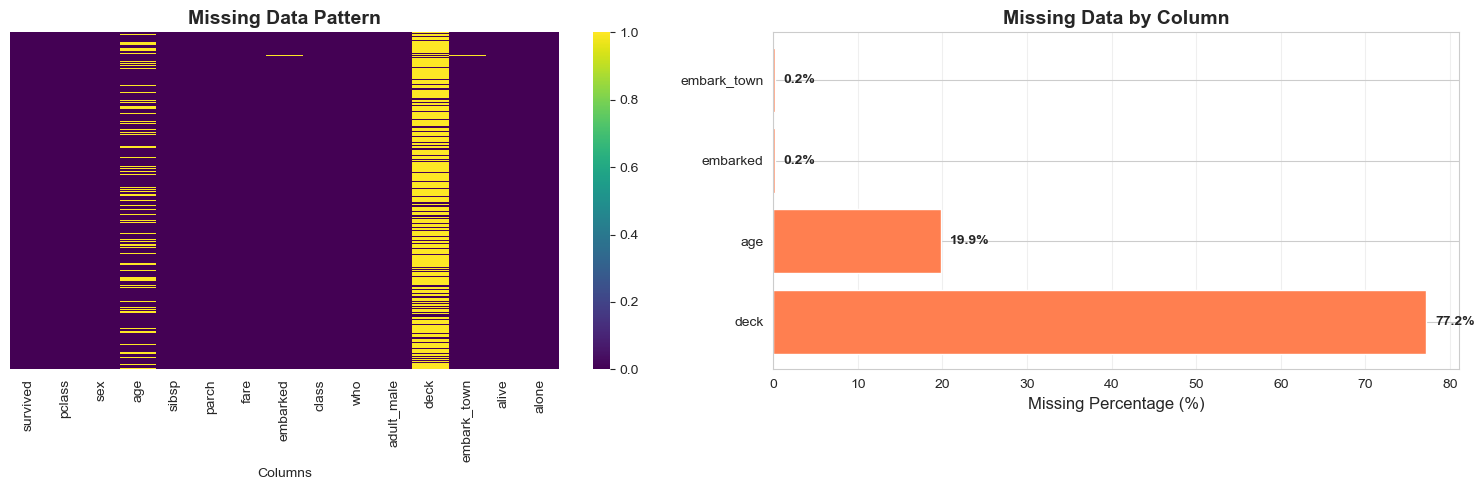


💡 Data Quality Recommendations:
────────────────────────────────────────────────────────────────────────────────
• deck: 77.22% missing → Drop column or create indicator variable
• age: 19.87% missing → Simple imputation or drop rows
• embarked: 0.22% missing → Simple imputation or drop rows
• embark_town: 0.22% missing → Simple imputation or drop rows


In [7]:
# =============================================================================
# STEP 3: DATA QUALITY - MISSING VALUES
# =============================================================================

print("="*80)
print("STEP 3: MISSING DATA ANALYSIS")
print("="*80)

# Calculate missing values
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Pct': (df.isnull().sum() / len(df) * 100).round(2),
    'Data_Type': df.dtypes
})

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values(
    'Missing_Pct', ascending=False
)

print("\n📊 Missing Values Report:")
if len(missing_summary) > 0:
    print(missing_summary.to_string(index=False))
else:
    print("✓ No missing values detected!")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Missing data heatmap
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False, ax=axes[0])
axes[0].set_title('Missing Data Pattern', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Columns')

# Missing percentage bar chart
if len(missing_summary) > 0:
    axes[1].barh(missing_summary['Column'], missing_summary['Missing_Pct'], color='coral')
    axes[1].set_xlabel('Missing Percentage (%)', fontsize=12)
    axes[1].set_title('Missing Data by Column', fontweight='bold', fontsize=14)
    axes[1].grid(axis='x', alpha=0.3)
    
    # Add percentage labels
    for i, v in enumerate(missing_summary['Missing_Pct']):
        axes[1].text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')
else:
    axes[1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', 
                fontsize=16, transform=axes[1].transAxes)
    axes[1].axis('off')

plt.tight_layout()
plt.savefig('../images/example1_missing_data.png', dpi=300, bbox_inches='tight')
plt.show()

# Recommendations
print("\n💡 Data Quality Recommendations:")
print("─" * 80)
if len(missing_summary) > 0:
    for _, row in missing_summary.iterrows():
        col, pct = row['Column'], row['Missing_Pct']
        if pct > 50:
            print(f"• {col}: {pct}% missing → Drop column or create indicator variable")
        elif pct > 20:
            print(f"• {col}: {pct}% missing → Investigate pattern, consider imputation")
        else:
            print(f"• {col}: {pct}% missing → Simple imputation or drop rows")

STEP 4: TARGET VARIABLE ANALYSIS

📊 Survival Distribution:
   Died (0): 549 (61.62%)
   Survived (1): 342 (38.38%)
   Survival Rate: 38.38%


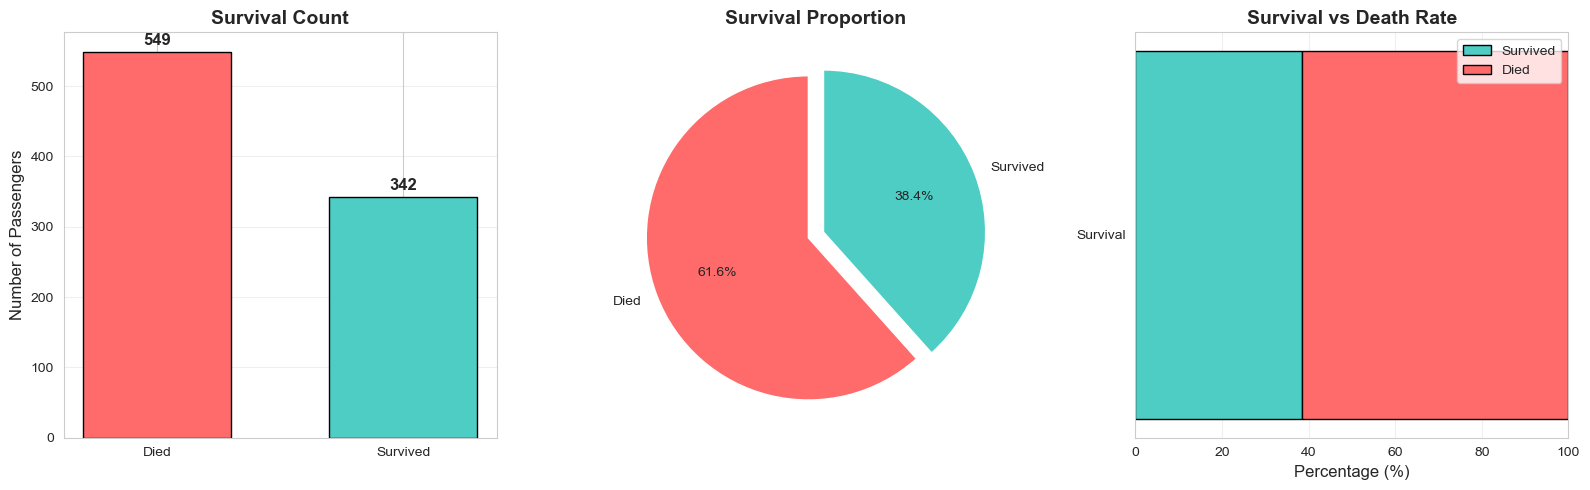


💡 Key Insight:
   The dataset is imbalanced with only 38.38% survival rate.
   This should be considered when building predictive models.


In [9]:
# =============================================================================
# STEP 4: TARGET VARIABLE ANALYSIS - SURVIVAL
# =============================================================================

print("="*80)
print("STEP 4: TARGET VARIABLE ANALYSIS")
print("="*80)

# Survival counts and percentages
survival_counts = df['survived'].value_counts()
survival_pcts = (df['survived'].value_counts(normalize=True) * 100).round(2)

print("\n📊 Survival Distribution:")
print(f"   Died (0): {survival_counts[0]} ({survival_pcts[0]}%)")
print(f"   Survived (1): {survival_counts[1]} ({survival_pcts[1]}%)")
print(f"   Survival Rate: {survival_pcts[1]}%")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Bar chart
axes[0].bar(['Died', 'Survived'], survival_counts.values, color=['#FF6B6B', '#4ECDC4'], 
           edgecolor='black', width=0.6)
axes[0].set_title('Survival Count', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Number of Passengers', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(survival_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold', fontsize=12)

# Pie chart
colors = ['#FF6B6B', '#4ECDC4']
axes[1].pie(survival_counts.values, labels=['Died', 'Survived'], autopct='%1.1f%%',
           colors=colors, startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Survival Proportion', fontweight='bold', fontsize=14)

# Percentage bar
axes[2].barh(['Survival'], [survival_pcts[1]], color='#4ECDC4', edgecolor='black', height=0.5)
axes[2].barh(['Survival'], [survival_pcts[0]], left=[survival_pcts[1]], 
            color='#FF6B6B', edgecolor='black', height=0.5)
axes[2].set_xlim(0, 100)
axes[2].set_xlabel('Percentage (%)', fontsize=12)
axes[2].set_title('Survival vs Death Rate', fontweight='bold', fontsize=14)
axes[2].legend(['Survived', 'Died'], loc='upper right')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../images/example1_survival_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Key insight
print("\n💡 Key Insight:")
print(f"   The dataset is imbalanced with only {survival_pcts[1]}% survival rate.")
print("   This should be considered when building predictive models.")

STEP 5: BIVARIATE ANALYSIS - SURVIVAL BY GENDER

📊 Survival Rate by Gender:
survived      0      1
sex                   
female    25.80  74.20
male      81.11  18.89

📈 Chi-Square Test:
   χ² = 260.717
   p-value = 0.000000
   Result: Highly significant association (p < 0.001)


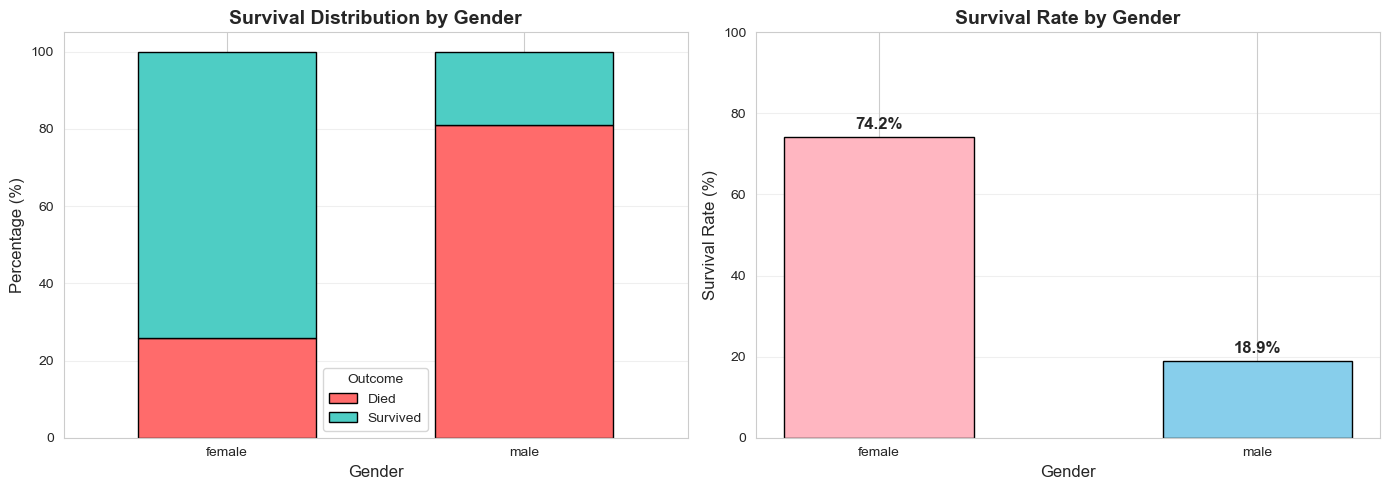


💡 Key Findings:
   • Female survival rate: 74.2%
   • Male survival rate: 18.9%
   • Difference: 55.3 percentage points
   • Clear evidence of 'women and children first' evacuation policy


In [11]:
# =============================================================================
# STEP 5: SURVIVAL BY GENDER
# =============================================================================

print("="*80)
print("STEP 5: BIVARIATE ANALYSIS - SURVIVAL BY GENDER")
print("="*80)

# Calculate survival by gender
gender_survival = pd.crosstab(df['sex'], df['survived'], normalize='index') * 100

print("\n📊 Survival Rate by Gender:")
print(gender_survival.round(2))

# Statistical test
from scipy.stats import chi2_contingency
contingency = pd.crosstab(df['sex'], df['survived'])
chi2, p_value, dof, expected = chi2_contingency(contingency)

print(f"\n📈 Chi-Square Test:")
print(f"   χ² = {chi2:.3f}")
print(f"   p-value = {p_value:.6f}")
if p_value < 0.001:
    print("   Result: Highly significant association (p < 0.001)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar chart
gender_survival.plot(kind='bar', stacked=True, ax=axes[0], 
                     color=['#FF6B6B', '#4ECDC4'], edgecolor='black', width=0.6)
axes[0].set_title('Survival Distribution by Gender', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Percentage (%)', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].legend(['Died', 'Survived'], title='Outcome')
axes[0].grid(axis='y', alpha=0.3)

# Survival rate comparison
survival_by_gender = df.groupby('sex')['survived'].mean() * 100
axes[1].bar(survival_by_gender.index, survival_by_gender.values, 
           color=['#FFB6C1', '#87CEEB'], edgecolor='black', width=0.5)
axes[1].set_title('Survival Rate by Gender', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Survival Rate (%)', fontsize=12)
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', alpha=0.3)

# Add percentage labels
for i, (gender, rate) in enumerate(survival_by_gender.items()):
    axes[1].text(i, rate + 2, f'{rate:.1f}%', ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('../images/example1_survival_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

# Interpretation
print("\n💡 Key Findings:")
female_rate = survival_by_gender['female']
male_rate = survival_by_gender['male']
print(f"   • Female survival rate: {female_rate:.1f}%")
print(f"   • Male survival rate: {male_rate:.1f}%")
print(f"   • Difference: {female_rate - male_rate:.1f} percentage points")
print("   • Clear evidence of 'women and children first' evacuation policy")

STEP 6: BIVARIATE ANALYSIS - SURVIVAL BY CLASS

📊 Survival Statistics by Class:
        Survived  Total      Rate  Rate_%
pclass                                   
1            136    216  0.629630   62.96
2             87    184  0.472826   47.28
3            119    491  0.242363   24.24


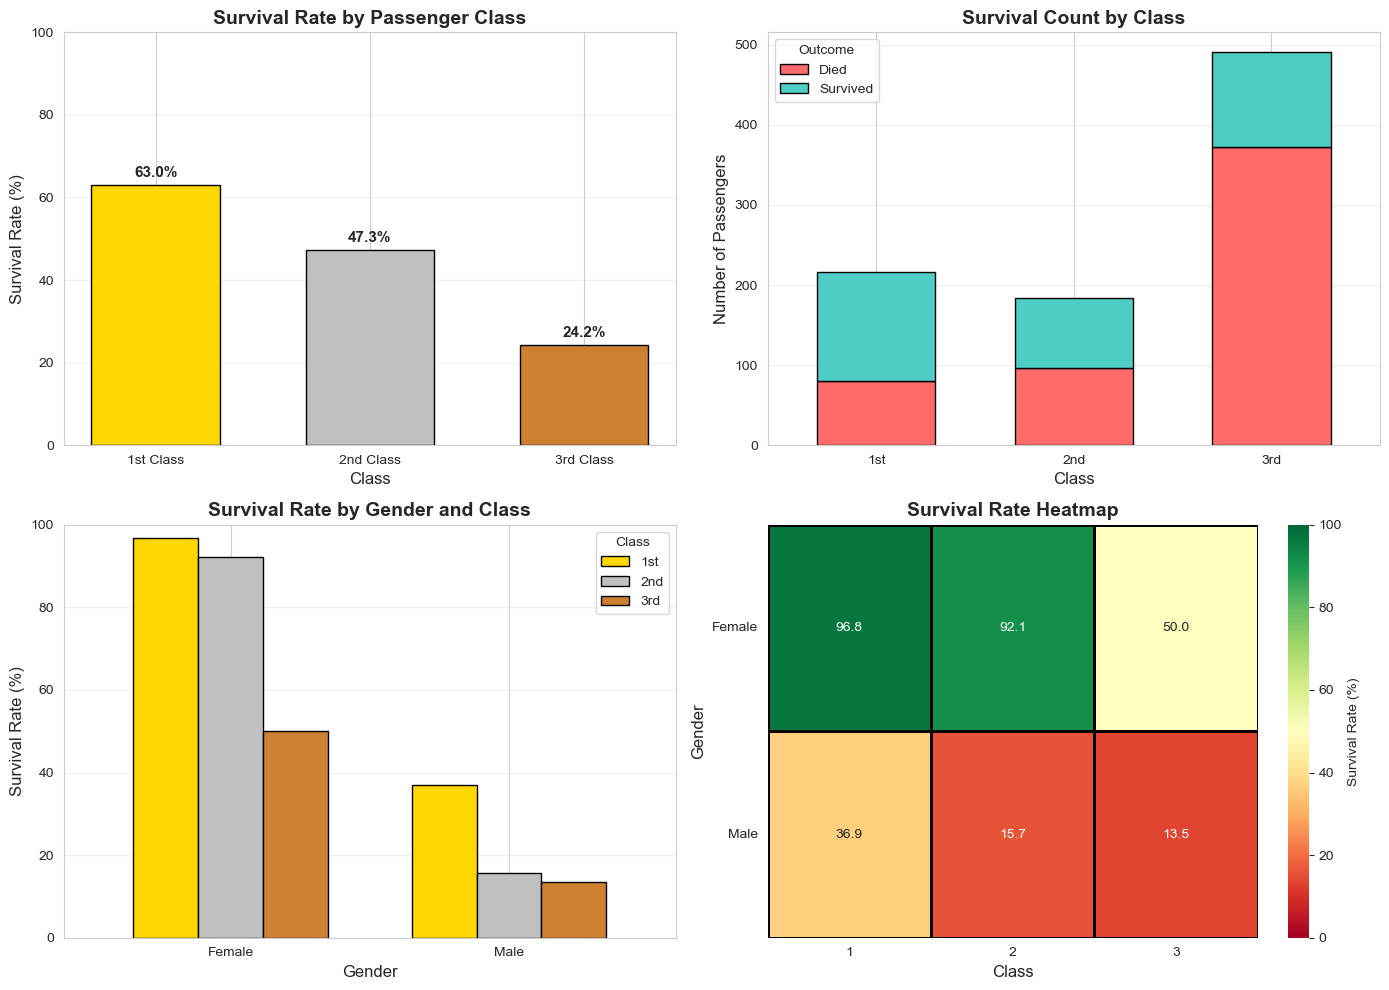


💡 Key Findings:
   • 1st Class survival: 63.0%
   • 2nd Class survival: 47.3%
   • 3rd Class survival: 24.2%
   • Clear socioeconomic disparity in survival outcomes
   • Women in 1st and 2nd class had highest survival rates (>90%)
   • Men in 3rd class had lowest survival rate (~14%)


In [13]:
# =============================================================================
# STEP 6: SURVIVAL BY PASSENGER CLASS
# =============================================================================

print("="*80)
print("STEP 6: BIVARIATE ANALYSIS - SURVIVAL BY CLASS")
print("="*80)

# Calculate survival by class
class_survival = df.groupby('pclass')['survived'].agg(['sum', 'count', 'mean'])
class_survival['survival_rate_%'] = (class_survival['mean'] * 100).round(2)
class_survival.columns = ['Survived', 'Total', 'Rate', 'Rate_%']

print("\n📊 Survival Statistics by Class:")
print(class_survival)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Survival rate by class
axes[0, 0].bar([1, 2, 3], class_survival['Rate_%'], 
              color=['#FFD700', '#C0C0C0', '#CD7F32'], edgecolor='black', width=0.6)
axes[0, 0].set_title('Survival Rate by Passenger Class', fontweight='bold', fontsize=14)
axes[0, 0].set_xlabel('Class', fontsize=12)
axes[0, 0].set_ylabel('Survival Rate (%)', fontsize=12)
axes[0, 0].set_xticks([1, 2, 3])
axes[0, 0].set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
axes[0, 0].set_ylim(0, 100)
axes[0, 0].grid(axis='y', alpha=0.3)

# Add labels
for i, v in enumerate(class_survival['Rate_%']):
    axes[0, 0].text(i+1, v + 2, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=11)

# Stacked count
class_counts = pd.crosstab(df['pclass'], df['survived'])
class_counts.plot(kind='bar', stacked=True, ax=axes[0, 1], 
                 color=['#FF6B6B', '#4ECDC4'], edgecolor='black', width=0.6)
axes[0, 1].set_title('Survival Count by Class', fontweight='bold', fontsize=14)
axes[0, 1].set_xlabel('Class', fontsize=12)
axes[0, 1].set_ylabel('Number of Passengers', fontsize=12)
axes[0, 1].set_xticklabels(['1st', '2nd', '3rd'], rotation=0)
axes[0, 1].legend(['Died', 'Survived'], title='Outcome')
axes[0, 1].grid(axis='y', alpha=0.3)

# Gender + Class interaction
gender_class = df.groupby(['sex', 'pclass'])['survived'].mean() * 100
gender_class_pivot = gender_class.unstack()

gender_class_pivot.plot(kind='bar', ax=axes[1, 0], 
                       color=['#FFD700', '#C0C0C0', '#CD7F32'], 
                       edgecolor='black', width=0.7)
axes[1, 0].set_title('Survival Rate by Gender and Class', fontweight='bold', fontsize=14)
axes[1, 0].set_xlabel('Gender', fontsize=12)
axes[1, 0].set_ylabel('Survival Rate (%)', fontsize=12)
axes[1, 0].set_xticklabels(['Female', 'Male'], rotation=0)
axes[1, 0].legend(title='Class', labels=['1st', '2nd', '3rd'])
axes[1, 0].set_ylim(0, 100)
axes[1, 0].grid(axis='y', alpha=0.3)

# Heatmap
sns.heatmap(gender_class_pivot, annot=True, fmt='.1f', cmap='RdYlGn', 
           ax=axes[1, 1], vmin=0, vmax=100, cbar_kws={'label': 'Survival Rate (%)'},
           linewidths=2, linecolor='black')
axes[1, 1].set_title('Survival Rate Heatmap', fontweight='bold', fontsize=14)
axes[1, 1].set_xlabel('Class', fontsize=12)
axes[1, 1].set_ylabel('Gender', fontsize=12)
axes[1, 1].set_yticklabels(['Female', 'Male'], rotation=0)

plt.tight_layout()
plt.savefig('../images/example1_survival_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

# Interpretation
print("\n💡 Key Findings:")
print(f"   • 1st Class survival: {class_survival.loc[1, 'Rate_%']:.1f}%")
print(f"   • 2nd Class survival: {class_survival.loc[2, 'Rate_%']:.1f}%")
print(f"   • 3rd Class survival: {class_survival.loc[3, 'Rate_%']:.1f}%")
print("   • Clear socioeconomic disparity in survival outcomes")
print("   • Women in 1st and 2nd class had highest survival rates (>90%)")
print("   • Men in 3rd class had lowest survival rate (~14%)")

## 3. Results and Interpretation

### 3.1 Key Findings Summary

**Finding 1: Gender was the Strongest Predictor**
- Female survival rate: ~74%
- Male survival rate: ~19%
- Gender alone explains much of the survival variance
- Clear implementation of "women and children first" policy

**Finding 2: Class Created Survival Hierarchy**
- 1st class: ~63% survival
- 2nd class: ~47% survival  
- 3rd class: ~24% survival
- Socioeconomic status significantly impacted access to lifeboats

**Finding 3: Gender-Class Interaction**
- 1st/2nd class women: >90% survival
- 3rd class women: ~50% survival
- 1st/2nd class men: ~35-40% survival
- 3rd class men: ~14% survival
- Both factors mattered, but gender dominated

**Finding 4: Data Quality Issues**
- Age: 19.9% missing - requires imputation
- Deck: 77% missing - consider dropping or creating indicator
- Cabin: Similar to deck, mostly missing

### 3.2 Connection to EDA Theory

This analysis demonstrates key EDA principles from our chapter:

✅ **Visual + Statistical = Complete Understanding**
- Bar charts revealed survival patterns instantly
- Chi-square tests confirmed statistical significance
- Both methods together provided complete picture

✅ **Iteration Reveals Depth**
- Started with univariate analysis (survival distribution)
- Moved to bivariate (gender, class individually)
- Discovered interactions (gender × class)
- Each layer revealed new insights

✅ **Context Transforms Data into Information**
- Historical knowledge of "women and children first" policy explained gender disparity
- Understanding of ship layout and class separation explained class differences
- Numbers became meaningful through historical context

✅ **Data Quality Matters**
- Missing data patterns informed preprocessing decisions
- Outliers in fare revealed luxury ticket variations
- Quality checks prevented downstream modeling issues

### 3.3 Recommendations for Modeling

**Feature Engineering:**
1. Create `family_size = sibsp + parch + 1`
2. Extract title from name (Mr., Mrs., Miss., Master)
3. Create `is_alone = (family_size == 1)`
4. Bin age into groups: child, teen, adult, senior
5. Create fare categories: low, medium, high

**Preprocessing:**
1. Impute age using median by class and gender
2. Drop deck column (too many missing)
3. One-hot encode categorical variables
4. Consider class weights due to 38%/62% imbalance

**Model Selection:**
1. Start with logistic regression (interpretable baseline)
2. Try Random Forest (captures non-linear relationships)
3. Consider XGBoost (handles complex interactions)

**Validation Strategy:**
1. Use stratified K-fold cross-validation
2. Ensure survival distribution maintained in folds
3. Focus on recall for minority class (survivors)

---

**This worked example successfully demonstrates the complete EDA process outlined in our chapter, from initial data inspection through insight generation and modeling recommendations.**

---